In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [3]:
def parser(x):
    return datetime.datetime.strptime('19'+x, '%Y-%m')

series =pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv',sep=';', header=0, parse_dates=[0],index_col=0, squeeze=True,date_parser=parser)
series=pd.DataFrame(series,columns=['Sales'])

In [4]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [5]:
series.dtypes

Sales    float64
dtype: object

In [6]:
series.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,36.0,312.6,148.937164,119.3,192.45,280.15,411.1,682.0


In [7]:
series.isnull().sum()

Sales    0
dtype: int64

(array([693961., 694081., 694204., 694326., 694446., 694569., 694691.,
        694811., 694934., 695056.]),
 <a list of 10 Text major ticklabel objects>)

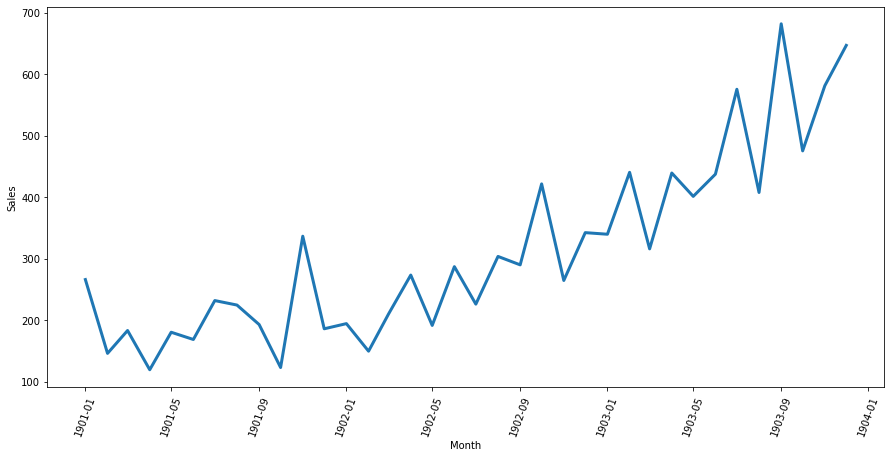

In [8]:
import seaborn as sns
fig=plt.figure(figsize=(15,7))
sns.lineplot(x=series.index , y=series.Sales,linewidth=3)
plt.xticks(rotation=70)

In [10]:
from statsmodels.tsa.stattools import adfuller , kpss
results=adfuller(series.Sales, regression='ctt')
print("ADF Test")
print(f"Test Statistic = {results[0]}")
print(f"P-Value = {results[1]}")

result=kpss(series.Sales,regression='ct')
print("\nKPSS Test")
print(f"Test Statistic = {results[0]}")
print(f"P-Value = {results[1]}")

ADF Test
Test Statistic = -4.244858733944584
P-Value = 0.015095224576492592

KPSS Test
Test Statistic = -4.244858733944584
P-Value = 0.015095224576492592


aaaa


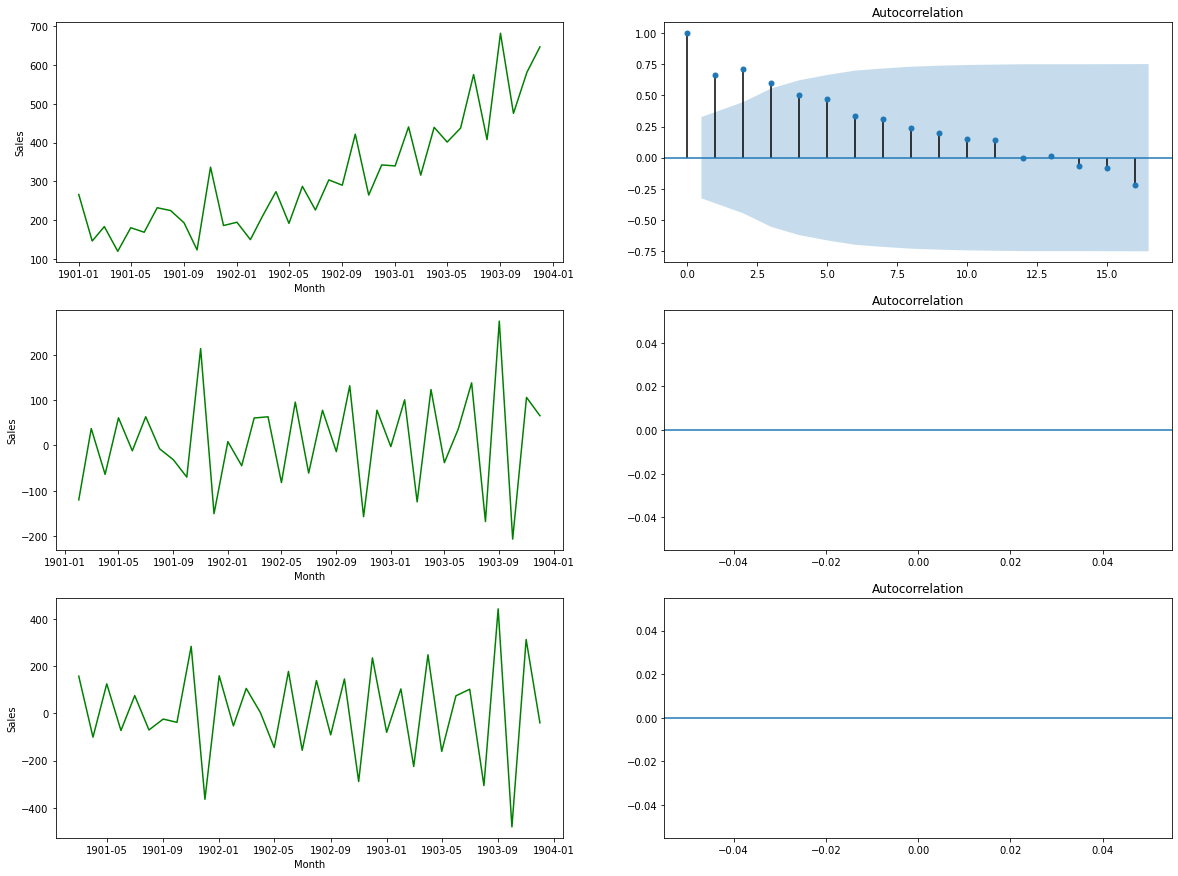

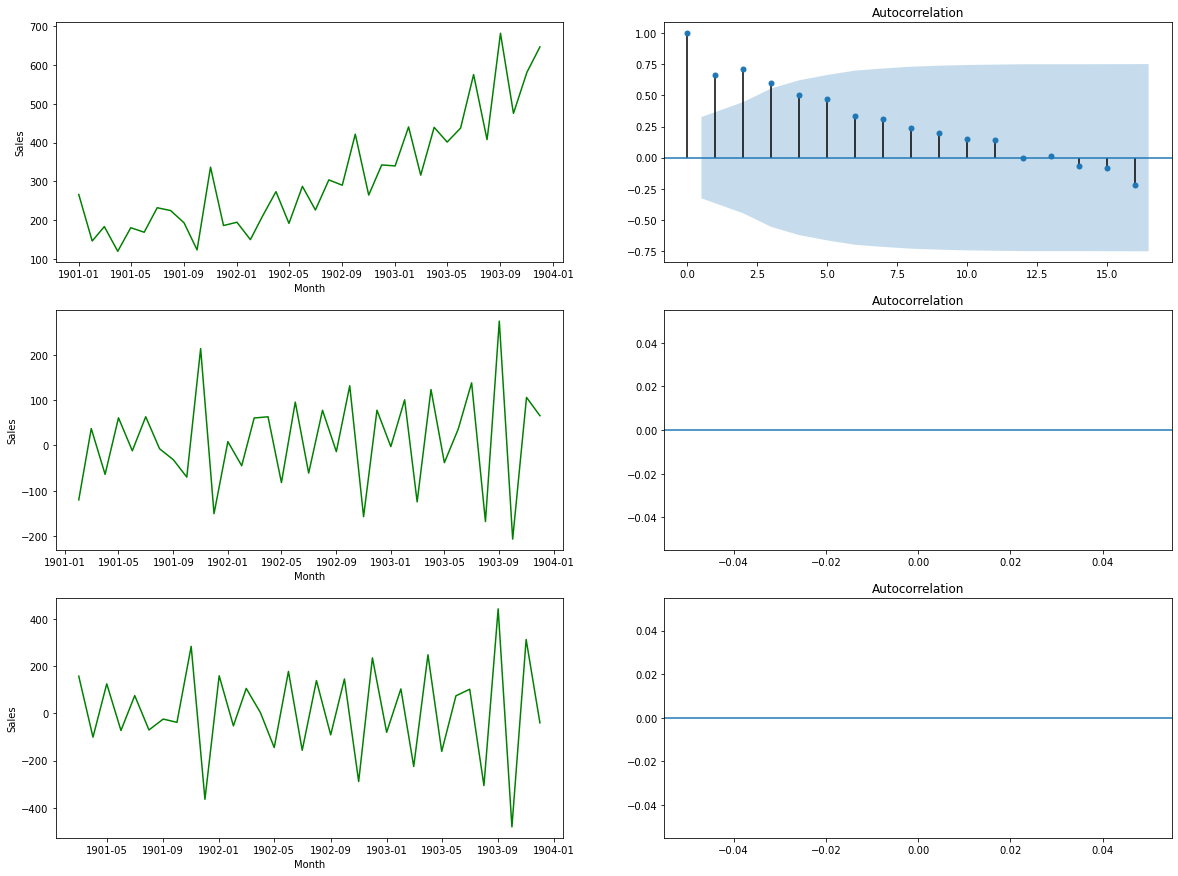

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf
import seaborn as sns
fig,ax=plt.subplots(3,2,figsize=(20,15))

sns.lineplot(x=series.index,y=series.Sales,ax=ax[0,0],color='g')
plot_acf(series.Sales,ax=ax[0,1])

sns.lineplot(x=series.index,y=series.Sales.diff(),ax=ax[1,0],color='g')
plot_acf(series.Sales.diff(),ax=ax[1,1])

sns.lineplot(x=series.index,y=series.Sales.diff().diff(),ax=ax[2,0],color='g')
plot_acf(series.diff().diff(),ax=ax[2,1])

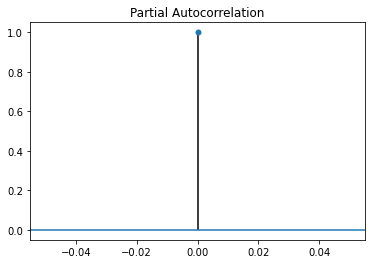

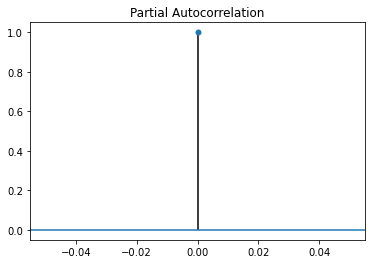

In [13]:
plot_pacf(series.Sales.diff())

In [110]:
model_1=ARIMA(series.Sales , order=(1,1,1))
model_1=model_1.fit()
model_1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Tue, 21 Sep 2021   AIC                            402.467
Time:                        10:09:24   BIC                            408.688
Sample:                    02-01-1901   HQIC                           404.614
                         - 12-01-1903                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0965      3.651      3.313      0.001       4.940      19.253
ar.L1.D.Sales    -0.5674      0.161     -3.526      0.000      -0.883      -0.252
ma.L1.D.Sales    -0.5133      0.155     -3.303      0.001      -0.818      -0.209
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7625           +0.0000j            1.7625            0.5000
MA.1            1.9483           +0.0000j            1.9483            0.0000
-----------------------------------------------------------------------------
"""

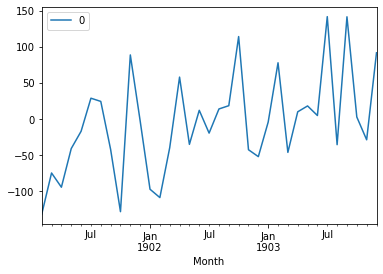

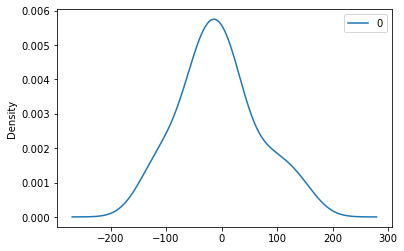

In [111]:
residuals=pd.DataFrame(model_1.resid)
residuals.plot()
residuals.plot(kind='kde')

In [112]:
series.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [145]:
train_end=datetime.date(1902,12,1)
test_end=datetime.date(1903,12,1)
train_data=series.loc[:train_end]
test_data=series.loc[train_end+datetime.timedelta(days=30):test_end]

model_2=ARIMA(train_data,order=(1,0,1)).fit()
pred=model_2.predict(start=test_data.index[0],end=test_data.index[-1])
print(pred,test_data)
mean_squared_error(test_data,pred)

1903-01-01    293.133594
1903-02-01    287.195256
1903-03-01    281.914348
1903-04-01    277.218086
1903-05-01    273.041745
1903-06-01    269.327764
1903-07-01    266.024956
1903-08-01    263.087800
1903-09-01    260.475815
1903-10-01    258.153001
1903-11-01    256.087345
1903-12-01    254.250376
Freq: MS, dtype: float64             Sales
Month            
1903-01-01  339.7
1903-02-01  440.4
1903-03-01  315.9
1903-04-01  439.3
1903-05-01  401.3
1903-06-01  437.4
1903-07-01  575.5
1903-08-01  407.6
1903-09-01  682.0
1903-10-01  475.3
1903-11-01  581.3
1903-12-01  646.9


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


58266.265467522295

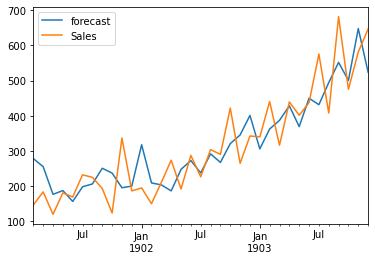

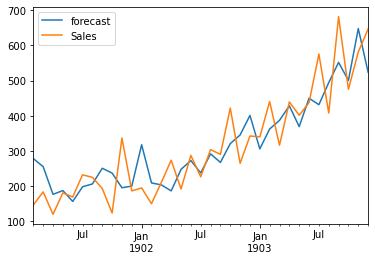

In [16]:
model_1.plot_predict(dynamic=False)

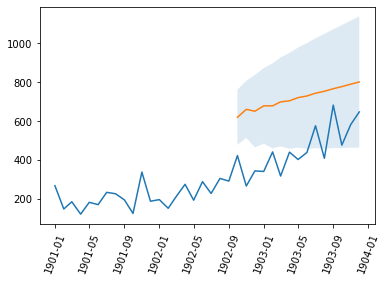

In [108]:
prediction,std_err,conf_int=model_1.forecast(15,alpha=0.05)
prediction=pd.Series(prediction,index=series.index[-15:])
conf_int=pd.DataFrame(conf_int,columns=['lower_series','upper_series'])

plt.plot(series.Sales)
plt.plot(prediction)
plt.xticks(rotation=70)
plt.fill_between(series.index[-15:],conf_int.lower_series[-15:],conf_int.upper_series[-15:],alpha=0.15)

In [17]:
import pmdarima as pm

In [18]:
model=pm.auto_arima(series.Sales,start_p=0,start_q=0,test='adf',max_p=3,max_q=3,seasonal=False)


In [19]:
model.order

(1, 1, 2)

In [ ]:
model.forecast

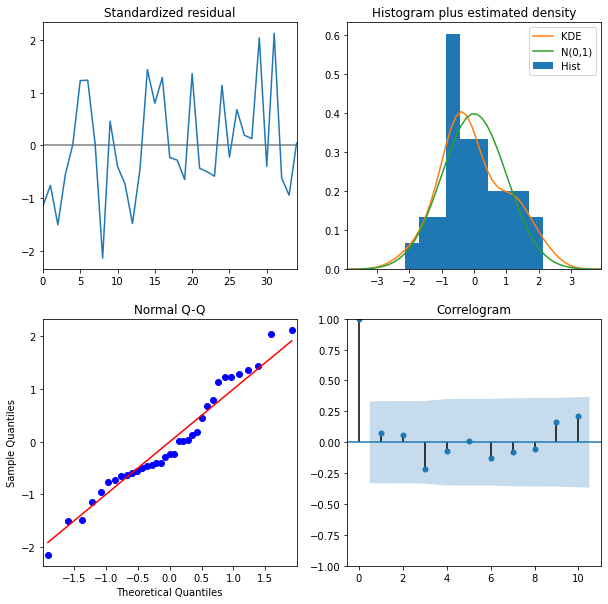

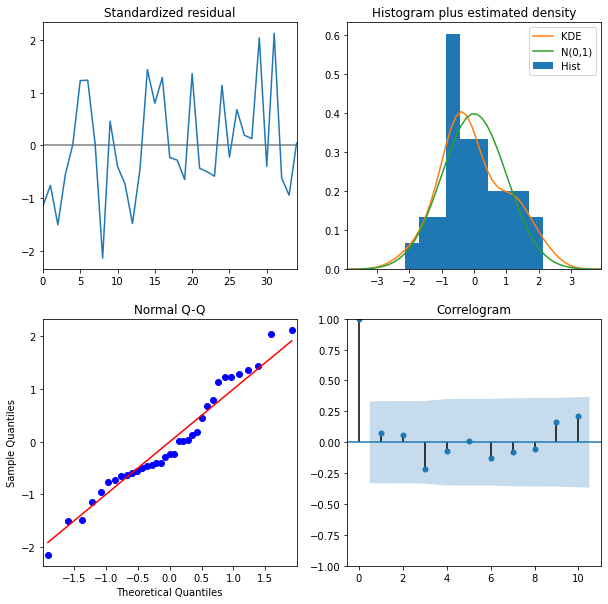

In [27]:
model.plot_diagnostics(figsize=(10,10))

In [122]:
from sklearn.model_selection import TimeSeriesSplit
tscv=TimeSeriesSplit(n_splits=6)
rmse=[]
for fold,(train_index,test_index) in enumerate(tscv.split(series)) :
    print(f"\nFold : {fold}")
    print(f"Train Indices :{train_index}; \nTest Indices : {test_index}")
    train_data,test_data=series.iloc[train_index],series.iloc[test_index]
    arima=ARIMA(train_data,order=(2,1,0)).fit()
    predictions=arima.forecast(steps=5)[0]
    print("MSE :",mean_squared_error(test_data.Sales,predictions))
    rmse.append((mean_squared_error(test_data.Sales,predictions)))
np.mean(rmse)


Fold : 0
Train Indices :[0 1 2 3 4 5]; 
Test Indices : [ 6  7  8  9 10]
MSE : 7258.270354079767

Fold : 1
Train Indices :[ 0  1  2  3  4  5  6  7  8  9 10]; 
Test Indices : [11 12 13 14 15]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MSE : 3301.833691837563

Fold : 2
Train Indices :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]; 
Test Indices : [16 17 18 19 20]
MSE : 1571.8098163121213

Fold : 3
Train Indices :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]; 
Test Indices : [21 22 23 24 25]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MSE : 7400.843531334435

Fold : 4
Train Indices :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]; 
Test Indices : [26 27 28 29 30]
MSE : 4899.144918420638

Fold : 5
Train Indices :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]; 
Test Indices : [31 32 33 34 35]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

MSE : 6667.026899379392


5183.154868560652

In [147]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [148]:
series.diff().head()
#1st value = below value original - differenced value below

,Sales
Month,
1901-01-01,NaN
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0


In [149]:
series.diff().cumsum().head()

,Sales
Month,
1901-01-01,NaN
1901-02-01,-120.1
1901-03-01,-82.9
1901-04-01,-146.7
1901-05-01,-85.7
